# Explore here

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [2]:
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/Finarosalina_diabetes_machine-learning-py-template/main/data/processed/clean_test.csv")
train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/Finarosalina_diabetes_machine-learning-py-template/main/data/processed/clean_train.csv")


In [3]:
test_data.head()
train_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0,0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0,1
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0,0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0,0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0,1


In [4]:
X_train=train_data.drop(["Outcome"], axis = 1)
y_train=train_data["Outcome"]
X_test=test_data.drop(["Outcome"], axis=1)
y_test=test_data["Outcome"]
X_train
y_train

0      0
1      1
2      0
3      0
4      1
      ..
609    0
610    0
611    1
612    1
613    0
Name: Outcome, Length: 614, dtype: int64

In [34]:
X_test.to_csv("/workspaces/Finarosalina_Random_Forest_/data/processed/X_test_data")
X_train.to_csv("/workspaces/Finarosalina_Random_Forest_/data/processed/X_train_data")

In [30]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=150)

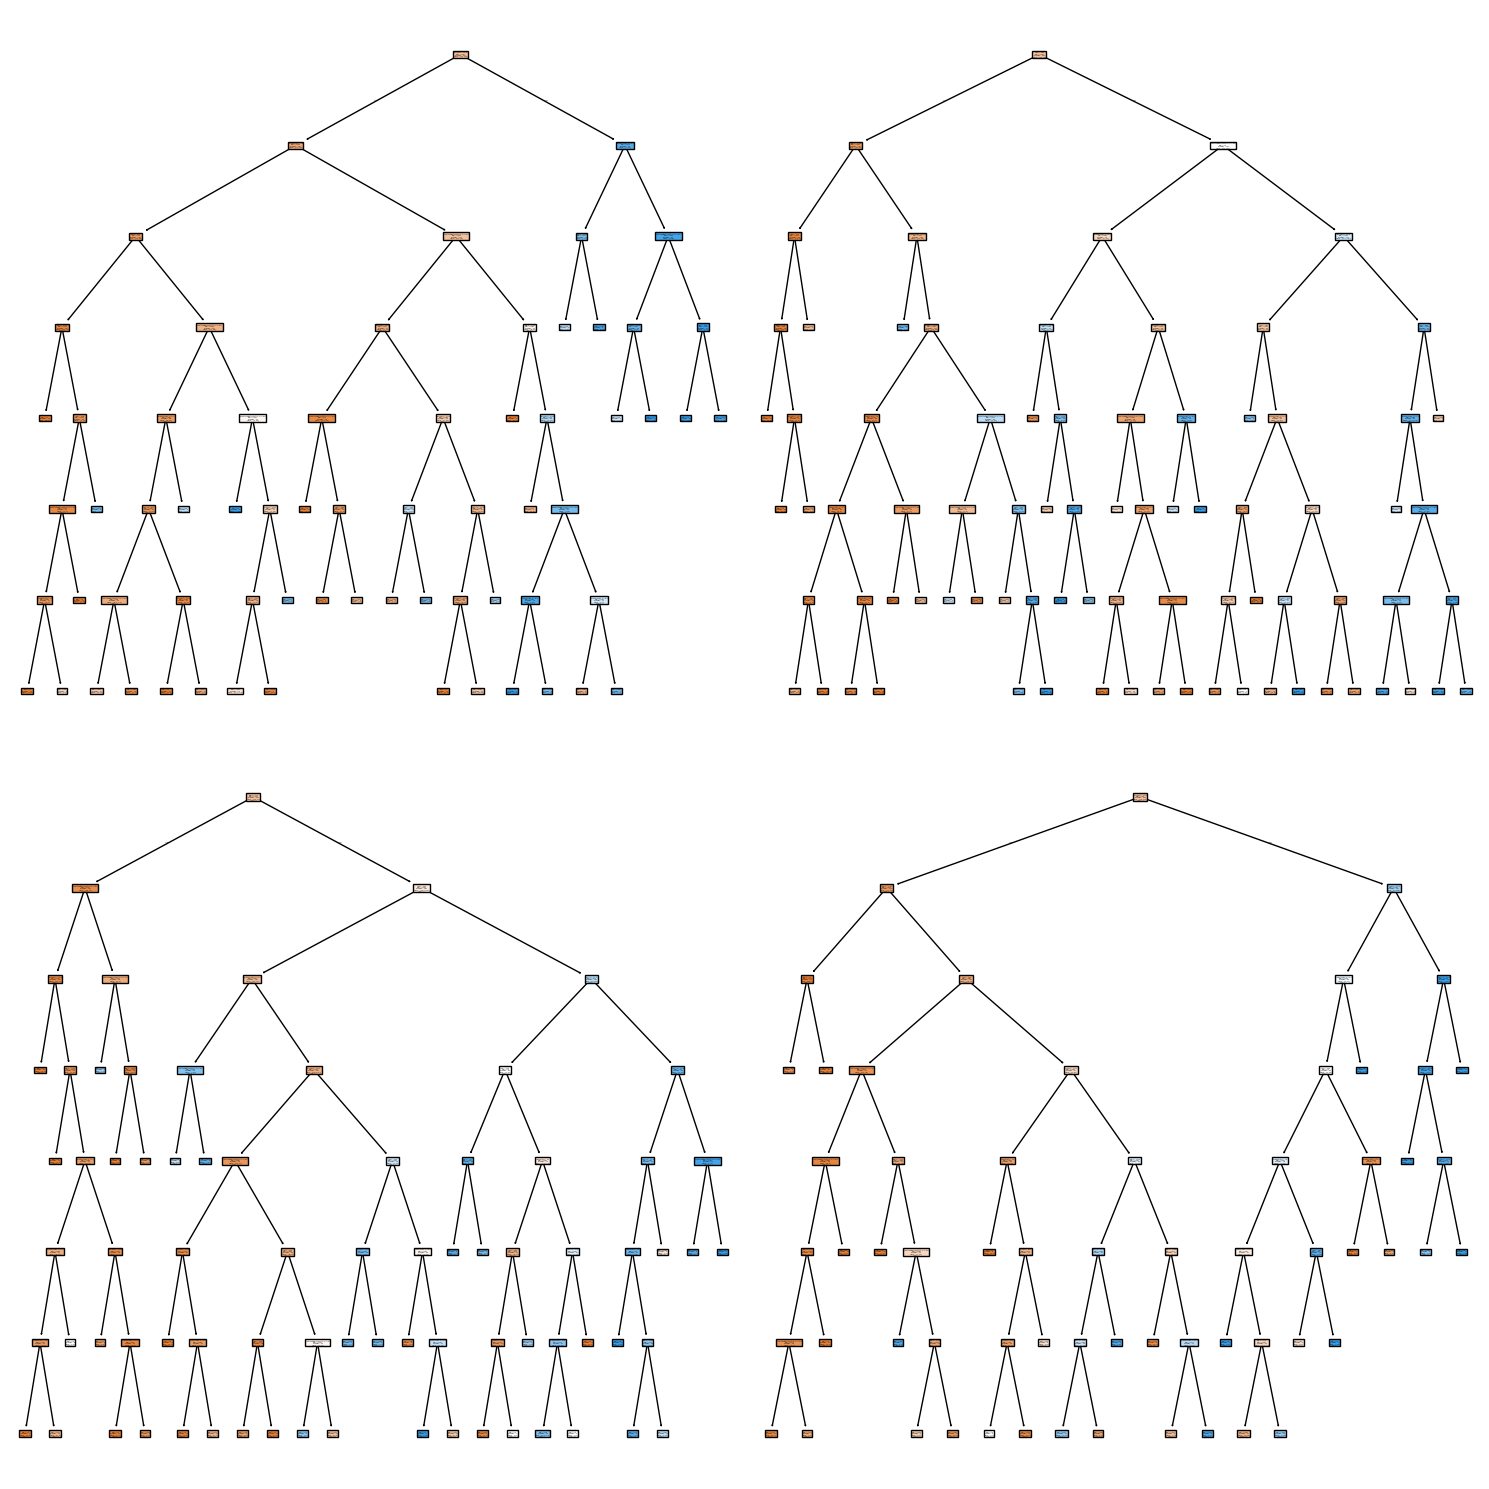

In [6]:
import matplotlib.pyplot as plt
from sklearn import tree

# Crear figura de 2x2
fig, axis = plt.subplots(2, 2, figsize=(15, 15))


tree.plot_tree(model.estimators_[0], ax=axis[0, 0],
               feature_names=X_train.columns.tolist(),
               class_names=["0", "1"],
               filled=True)

tree.plot_tree(model.estimators_[1], ax=axis[0, 1],
               feature_names=X_train.columns.tolist(),
               class_names=["0", "1"],
               filled=True)

tree.plot_tree(model.estimators_[2], ax=axis[1, 0],
               feature_names=X_train.columns.tolist(),
               class_names=["0", "1"],
               filled=True)

tree.plot_tree(model.estimators_[3], ax=axis[1, 1],
               feature_names=X_train.columns.tolist(),
               class_names=["0", "1"],
               filled=True)

plt.tight_layout()
plt.show()


In [31]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7727272727272727

In [36]:
from pickle import dump
model_filename = "/workspaces/Finarosalina_Random_Forest_/models/random_forest_classifier_default_42.sav"
dump(model, open(model_filename, "wb"))

print(f"Modelo guardado exitosamente en: {model_filename}")


Modelo guardado exitosamente en: /workspaces/Finarosalina_Random_Forest_/models/random_forest_classifier_default_42.sav


tras hacer varias pruebas con los parametros, dejo los que obtienen mejores resultados. La verdad es que no he mejorado con relación al DecisionTreeClassifie, a pesar de aunmentar el numero de árboles. Supongo que son muy pocos datos para permitir desarrollarse los árboles.

In [39]:
import json

# Ruta del archivo .ipynb
notebook_path = "/workspaces/Finarosalina_Random_Forest_/src/explore.ipynb"

# Leer el archivo .ipynb como JSON
with open(notebook_path, 'r', encoding='utf-8') as f:
    notebook = json.load(f)

# Extraer el código de las celdas tipo "code"
code_cells = []
for cell in notebook.get('cells', []):
    if cell.get('cell_type') == 'code':
        code = ''.join(cell.get('source', []))
        code_cells.append(code)

# Ruta del archivo .py donde se guardará el código
output_path = "/workspaces/Finarosalina_Random_Forest_/src/app.py"

# Combinar el código y escribirlo en el archivo .py
with open(output_path, 'w', encoding='utf-8') as f:
    f.write("# Código extraído desde explore.ipynb\n\n")
    f.write("\n\n".join(code_cells))

print("✅ Código copiado exitosamente a app.py")


✅ Código copiado exitosamente a app.py
